In [21]:
import flask
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from flask import Flask
from google.colab import output
output.serve_kernel_port_as_window(5000)

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

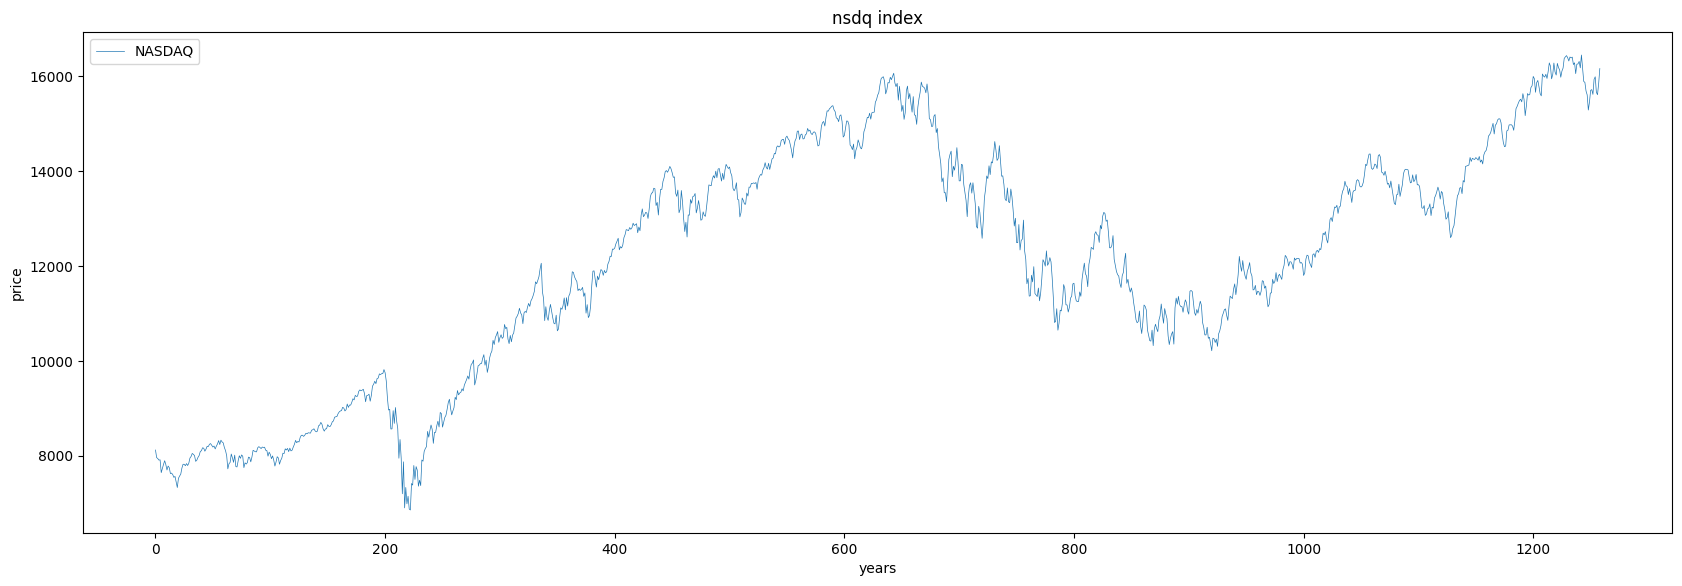

In [5]:
#NSDQ = web.DataReader('^IXIC', data_source='yahoo', start='2020-01-01' ,end='2024-1-1')
#NSDQ
data = pd.read_csv('^IXIC.csv')

#print(df.to_string())
plt.figure(figsize=(20.5,6.5))
plt.plot(data['Close'] , label = 'NASDAQ' , linewidth=.5)
plt.title('nsdq index')
plt.xlabel('years')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show

In [7]:
data = data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len


1008

In [8]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#scaled_data

train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []


In [9]:

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train ,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,batch_size=1,epochs=1)

test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


[array([0.13177647, 0.1151267 , 0.11299343, 0.10957749, 0.11024023,
       0.08206937, 0.09119842, 0.10034724, 0.10826872, 0.09973459,
       0.08784714, 0.09654516, 0.09290479, 0.0801135 , 0.08102463,
       0.07792912, 0.0716629 , 0.07379305, 0.06183564, 0.04929799,
       0.06955572, 0.07460292, 0.07878491, 0.09199264, 0.10045369,
       0.10039106, 0.09727573, 0.10191066, 0.09768694, 0.10273413,
       0.11409556, 0.1175856 , 0.12426721, 0.12221849, 0.11950392,
       0.10687754, 0.10951282, 0.11554417, 0.11956028, 0.12842316,
       0.13029443, 0.13667547, 0.13579462, 0.12917666, 0.133701  ,
       0.14004657, 0.1393692 , 0.14438924, 0.14585568, 0.14216205,
       0.1382389 , 0.14053814, 0.13419782, 0.14021454, 0.14514702,
       0.15246314, 0.14380482, 0.15337218, 0.14952312, 0.14746502])]
[0.13721713509884614]
[array([0.13177647, 0.1151267 , 0.11299343, 0.10957749, 0.11024023,
       0.08206937, 0.09119842, 0.10034724, 0.10826872, 0.09973459,
       0.08784714, 0.09654516, 0.092

<ipython-input-10-c4c5dfc8b783>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


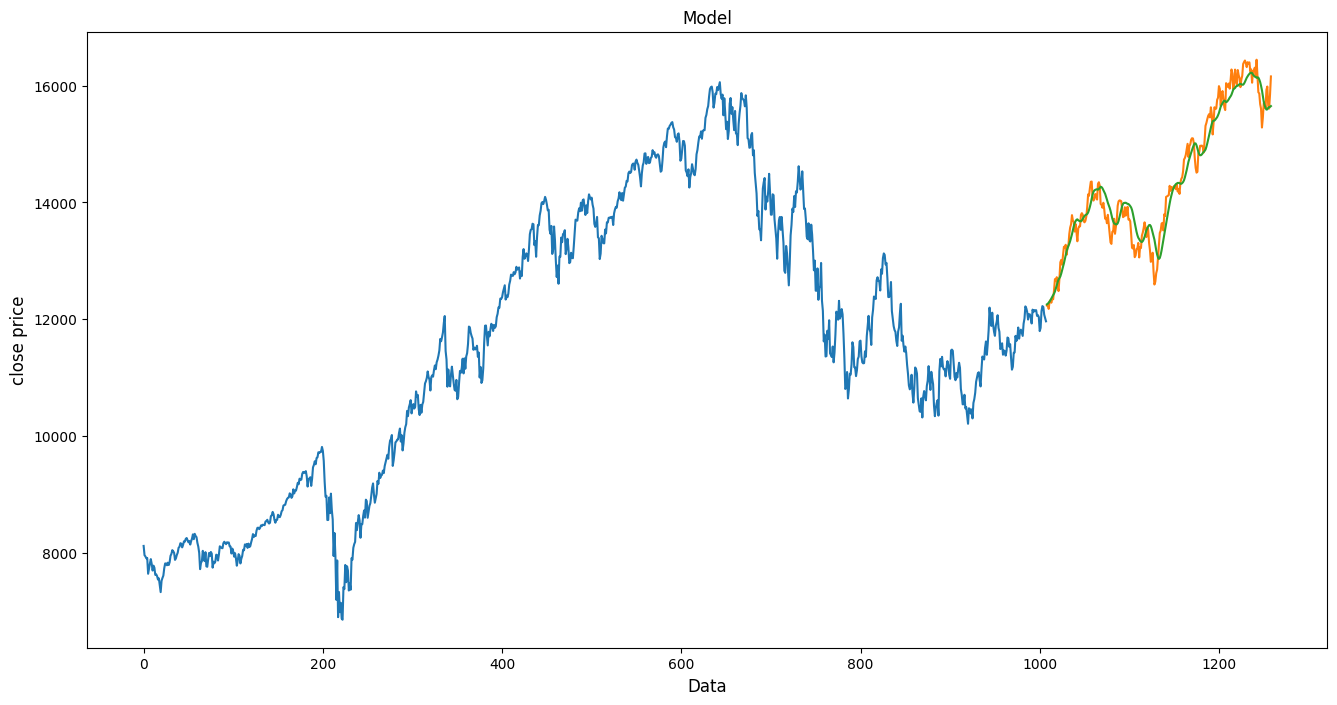

In [10]:

rmse = np.sqrt(np.mean( predictions - y_test)**2 )
#rmse

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Data' , fontsize=12)
plt.ylabel('close price' , fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])


In [ ]:

app = Flask(__name__)

@app.route('/')
def hello_world():
   return ('Hello World')

if __name__ == '__main__':
       app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
